In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from sklearn.svm import SVC

In [10]:
from scipy import stats

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
import pandas as pd

In [13]:
feature_col = range(1,562)
label_col = ["label"]

In [14]:
df_x = pd.read_table("X_train.txt", sep=" ", names=feature_col)

In [15]:
df_y = pd.read_table("y_train.txt", sep=" ", names=label_col)

In [16]:
df_x.head()

,1,2,3,4,5,6,7,8,9,10,...,552,553,554,555,556,557,558,559,560,561
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [17]:
df_x.shape, df_y.shape

((7767, 561), (7767, 1))

In [18]:
X_ori = df_x.as_matrix()
y_ori = df_y.as_matrix()

In [19]:
y_ori = y_ori.reshape((7767,))

In [20]:
np.where(y_ori[y_ori == 1])

(array([   0,    1,    2, ..., 1223, 1224, 1225], dtype=int64),)

In [14]:
def get_data_of_missing_classes(missing_classes):
    missing_classes = list(missing_classes)
    label_indexes_to_add = np.array([])
    for label in missing_classes:
        class_indexes = np.where(y_ori == label)[0]
        #print(class_indexes)
        subset_of_class_indices = np.random.choice(class_indexes, 50)
        label_indexes_to_add = np.concatenate((label_indexes_to_add, subset_of_class_indices), axis=0)
    #label_indexes_to_add = map(int, label_indexes_to_add)
    #print(label_indexes_to_add)
    label_indexes_to_add = [int(x) for x in label_indexes_to_add]
    X_missing = X_ori[label_indexes_to_add]
    y_missing = y_ori[label_indexes_to_add]
    return X_missing, y_missing

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ori, y_ori)

In [16]:
X_train.shape

(5825, 561)

In [23]:
X_train=X_train[:-5]
y_train=y_train[:-5]

### Starting With Incremental SVM

In [18]:
train = np.column_stack((X_train, y_train))
test = np.column_stack((X_test, y_test))

In [19]:
## Shuffling Train
np.random.shuffle(train)

In [20]:
split_train = np.split(train, 5)

In [21]:
X_test, y_test = test[:,:-1], test[:,-1]

In [22]:
np.array(split_train).shape, X_train.shape

((5, 1164, 562), (5820, 561))

In [23]:
## First chunk of data
X1_train, y1_train = split_train[0][:,:-1], split_train[0][:,-1]

In [24]:
# ## Train first SVM on first chunk of data
# svm = SVC(kernel='rbf', C=1, probability=True)
# clf = svm.fit(X1_train,y1_train)

In [25]:
from time import time

In [26]:
#error just to stop :P

In [27]:
labels_list_set = set(list(range(1,13)))

In [28]:
## Incremental For loop with probability model
count=0
#del array_of_svms
start_time = time()
## Train first SVM on first chunk of data
svm = SVC(kernel='rbf', C=1, probability=True)
clf = svm.fit(X1_train,y1_train)
array_of_svms= []
array_of_svms.append(clf)
threshold_svm = 0.4
for ex in split_train[1:6]:
    predicted_values = np.array([])
    X, y = ex[:,:-1], ex[:,-1]
    inc_svm_predicted_proba = np.zeros((X.shape[0],12))
    for svm_classifier, weight in zip(array_of_svms, np.linspace(1,0.5,len(array_of_svms))):
        #print("Length")
        #print(len(array_of_svms))
        #print("Inc svm shape: ")
        #print(inc_svm_predicted_proba.shape)
        svm_predicted_proba = weight*svm_classifier.predict_proba(X)
        #print("Svm predicted shape: ")
        #print(svm_predicted_proba.shape)
        inc_svm_predicted_proba += svm_predicted_proba
    #print(inc_svm_predicted_proba)
    inc_svm_predicted_proba /= len(array_of_svms)
    #print(inc_svm_predicted_proba[:10])
    for x in inc_svm_predicted_proba:
        temp = np.where(x == max(x))[0][0]
        #print(type(temp))
        #print(temp)
        #break
        #print(x)
        #if (x[1] >= threshold_svm):
        #    temp = 1
        #else:
        #    temp=0
        predicted_values = np.append(predicted_values, temp+1)
        #predicted_values.append(temp)
        #print(temp)
    #print(predicted_values[:10])
    #print(y[:10])
    incorrectly_predicted_values = []
    for pred, actual in zip(predicted_values, y):
        if pred == actual:
            incorrectly_predicted_values.append(0)
        else:
            incorrectly_predicted_values.append(1)
    #print(incorrectly_predicted_values)
    incorrectly_predicted_values = np.array(incorrectly_predicted_values)
    index_of_misclassified_values = np.where(incorrectly_predicted_values == 1)
    #print(index_of_misclassified_values)
    X_misclf = X[index_of_misclassified_values]
    y_misclf = y[index_of_misclassified_values]
    #print(X_misclf)
    #print(y_misclf)
    if (set(y_misclf) != labels_list_set):
        missing_classes = labels_list_set - set(y_misclf)
        X_to_be_added, y_to_be_added = get_data_of_missing_classes(missing_classes)
        X_misclf = np.concatenate((X_misclf, X_to_be_added), axis=0)
        y_misclf = np.concatenate((y_misclf, y_to_be_added), axis=0)
    svm = SVC(kernel='rbf', C=1, probability=True)
    #print(y_misclf[:20])
    clf_new = svm.fit(X_misclf,y_misclf)
    array_of_svms.append(clf_new)
    del X_misclf
    del y_misclf
    del inc_svm_predicted_proba
    del predicted_values
    del incorrectly_predicted_values
    del index_of_misclassified_values
    del X
    del y
print("Total time taken by Inc. SVM....")
print(time() - start_time)

Total time taken by Inc. SVM....
19.26459002494812


In [30]:
# ## Incremental For loop with voting model
# count=0
# #del array_of_svms
# start_time = time()
# ## Train first SVM on first chunk of data
# svm = SVC(kernel='rbf', C=1, probability=True)
# clf = svm.fit(X1_train,y1_train)
# array_of_svms= []
# array_of_svms.append(clf)
# threshold_svm = 0.4
# for ex in split_train[1:6]:
#     predicted_values = np.array([])
#     X, y = ex[:,:-1], ex[:,-1]
#     inc_svm_predicted_proba = np.zeros((X.shape[0],12))
#     all_svm_predictions = []
#     for svm_classifier in array_of_svms:
#         svm_predicted = svm_classifier.predict(X)
#         all_svm_predictions.append(svm_predicted)
#     all_svm_predictions = np.array(all_svm_predictions)
#     ## for finding majority element using voting
#     predicted_values = stats.mode(all_svm_predictions)[0][0]        
#     incorrectly_predicted_values = []
#     for pred, actual in zip(predicted_values, y):
#         if pred == actual:
#             incorrectly_predicted_values.append(0)
#         else:
#             incorrectly_predicted_values.append(1)
#     #print(incorrectly_predicted_values)
#     incorrectly_predicted_values = np.array(incorrectly_predicted_values)
#     index_of_misclassified_values = np.where(incorrectly_predicted_values == 1)
#     #print(index_of_misclassified_values)
#     X_misclf = X[index_of_misclassified_values]
#     y_misclf = y[index_of_misclassified_values]
#     svm = SVC(kernel='rbf', C=1, probability=True)
#     clf_new = svm.fit(X_misclf,y_misclf)
#     array_of_svms.append(clf_new)
#     del X_misclf
#     del y_misclf
#     del inc_svm_predicted_proba
#     del predicted_values
#     del incorrectly_predicted_values
#     del index_of_misclassified_values
#     del X
#     del y
# print("Total time taken by Inc. SVM....")
# print(time() - start_time)

In [31]:
len(array_of_svms)

5

In [32]:
X_train.shape

(5820, 561)

In [33]:
len(set(y_train))

12

In [34]:
from sklearn.metrics import accuracy_score
for svm in array_of_svms:
    print(accuracy_score(y_test,svm.predict(X_test)))

0.857363542739
0.328527291452
0.513903192585
0.314624098867
0.324922760041


In [35]:
## Normal SVM
svm_start_time = time()
normal_svm = SVC(kernel='rbf', C=1, probability=True)
normal_svm.fit(X_train, y_train)
print("Time taken by normal SVM")
print(time() - svm_start_time)

Time taken by normal SVM
126.8692455291748


In [36]:
normal_svm_accuracy = accuracy_score(y_test,normal_svm.predict(X_test))

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
def predict_with_all_svms(svm_array, x):
    probabilities = np.zeros((1,12))
    for svm , weight in zip(svm_array, np.linspace(1,0.2,len(array_of_svms))):
        probabilities += weight*svm.predict_proba(x)
    probabilities /= len(array_of_svms)
    label = np.where(probabilities == max(probabilities[0]))[1][0]+1
    #print(probabilities)
    #print(max(probabilities[0]))
    return label

In [39]:
# def predict_with_voting(svm_array, x):
#     all_svm_predictions = []
#     for svm_classifier,weight in zip(array_of_svms, range(len(array_of_svms),1,-1)):
#         svm_predicted = svm_classifier.predict(x)
#         while(weight!=0):
#             all_svm_predictions.append(svm_predicted)
#             weight-=1
#     all_svm_predictions = np.array(all_svm_predictions)
#     ## for finding majority element using voting
#     predicted_values = stats.mode(all_svm_predictions)[0][0]
#     return predicted_values[0]

In [40]:
#predict_with_voting(array_of_svms, X_test[0])

In [41]:
# from sklearn.metrics import confusion_matrix
# for svm in array_of_svms:
#     print(confusion_matrix(y_test,svm.predict(X_test)))

In [42]:
#svm.predict_proba(X_test[0])

In [43]:
#svm.predict_proba(X_test[1]), svm.predict(X_test[1])

In [44]:
predicted_values = []
for i in range(len(y_test)):
    predicted_values.append(predict_with_all_svms(array_of_svms, X_test[i]))

In [ ]:
# g = np.array([1,2,3,5,8,44,5,1,22,7,9,3])
# np.where(g == 1)[0]

In [45]:
inc_svm_acuracy = accuracy_score(y_test,predicted_values)

In [46]:
# a = set([1,2,3,4,5,6])
# b = set([2,1,2,2,3,3,4,5,6])
# a!=b

In [47]:
# np.linspace(1,0.2,4)

In [48]:
inc_svm_acuracy

0.92121524201853755

In [49]:
normal_svm_accuracy

0.91452111225540678

In [25]:
inc_svm_time = 19.26459002494812

In [24]:
normal_svm_time = 126.8692455291748
normal_svm_accuracy = 0.91452111225540678
inc_svm_acuracy = 0.92121524201853755

## Plot Graphs

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sns.set_style("white")

In [3]:
import pylab

In [4]:
accuracy_plot = [normal_svm_accuracy, inc_svm_acuracy]
time_plot = [normal_svm_time, inc_svm_time]

NameError: name 'normal_svm_accuracy' is not defined

In [ ]:
x = range(1,3)
f = pylab.figure(figsize=(12,8))
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(x, accuracy_plot, align='center',width=0.2, color="black")
ax.set_xticks(x)
ax.set_xticklabels(['Normal SVM','Incremental SVM (Proposed)'], fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlim([0.5,2.5])
ax.set_ylim([0.9,0.94])
ax.axhline(y=normal_svm_accuracy, xmin=0, xmax=0.2,color='black', linestyle='--', linewidth=1)
ax.axhline(y=inc_svm_acuracy, xmin=0, xmax=0.7, color='black', linestyle='--', linewidth=1)
ax.set_ylabel("Accuracy", fontsize=25)
#ax.grid()
ax.set_title("Accuracy Comparison of normal svm and incremental SVM.", fontsize=25)
f.savefig(filename="Accuracy_of_normal_svm_vs_inc_svm.jpg",bbox_inches='tight')

In [ ]:
x = range(1,3)
f = pylab.figure(figsize=(12,8))
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(x, time_plot, align='center',width=0.2, color="black")
ax.set_xticks(x)
ax.set_xticklabels(['Normal SVM','Incremental SVM (Proposed)'], fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlim([0.5,2.5])
#ax.set_ylim([0.9,0.94])
ax.axhline(y=normal_svm_time, xmin=0, xmax=0.2,color='black', linestyle='--', linewidth=1)
ax.axhline(y=inc_svm_time, xmin=0, xmax=0.7, color='black', linestyle='--', linewidth=1)
ax.set_ylabel("Running Time (in sec)", fontsize=25)
#ax.set_xticks(np.arange(min(x), max(x)+1, 1.0))
#ax.set_yticks(range(0,140,20),1)
#ax.grid()
ax.set_title("Training Time Comparison of normal svm and incremental SVM.", fontsize=25)
#f.savefig(filename="Running_time_comparison_of_normal_svm_vs_inc_svm.jpg",bbox_inches='tight')

## data plotting

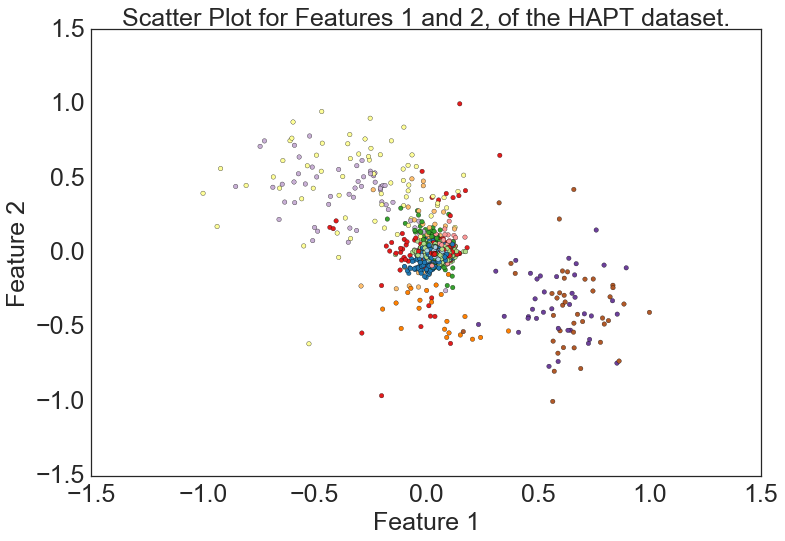

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap=plt.cm.Paired)
plt.xlabel("Feature 1",fontsize=25)
plt.ylabel("Feature 2",fontsize=25)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.title("Scatter Plot for Features 1 and 2, of the HAPT dataset.",fontsize=25)
plt.savefig(filename="Scatter Plot for Features 1 and 2, of the HAPT dataset.jpg",bbox_inches='tight')

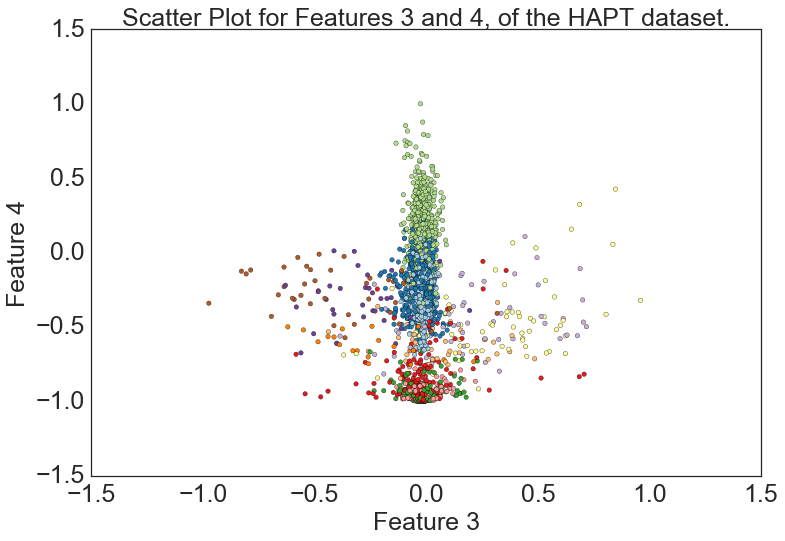

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,2],X_train[:,3],c=y_train, cmap=plt.cm.Paired)
plt.xlabel("Feature 3",fontsize=25)
plt.ylabel("Feature 4",fontsize=25)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.title("Scatter Plot for Features 3 and 4, of the HAPT dataset.",fontsize=25)
plt.savefig(filename="Scatter Plot for Features 3 and 4, of the HAPT dataset.jpg",bbox_inches='tight')

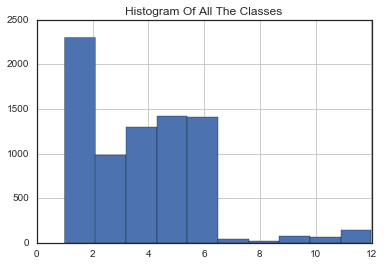

In [123]:
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING", "STAND_TO_SIT",\
          "SIT_TO_STAND", "SIT_TO_LIE", "LIE_TO_SIT", "STAND_TO_LIE", "LIE_TO_STAND"]
df_y.hist()
plt.title("Histogram Of All The Classes")

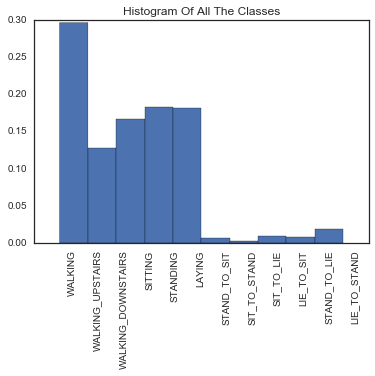

In [151]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.hist(df_y['label'],bins = 12)
mydata = df_y['label']
ax.hist(mydata, weights=np.zeros_like(mydata) + 1. / mydata.size)
plt.xlim(0,13)
plt.title("Histogram Of All The Classes");
plt.xticks(np.linspace(1.5,12.5,len(labels)), labels,rotation='vertical');